SQLAlchemy- SQL Server
Documentação Geral https://www.sqlalchemy.org/
Prepara o ambimente, primeiro é necessário instalar o SQLAlchemy

#pip install sqlalchemy
pip install tabulate para deixar a saida mais elegante
imporante o sqlalchemy infere os dados automáticamente, precisa validar os dados pois podem pesar no banco

In [2]:
# 📦 Importações
import pandas as pd
from sqlalchemy import create_engine, VARCHAR,Numeric, DateTime, Integer, Float,String, Date, text
from datetime import datetime
from PIL import Image


# 🔧 Configurações de conexão
server = r'WILLIAN\SQLEXPRESS'
database = 'SQL_DB_1'
driver = 'ODBC Driver 17 for SQL Server'

# 🚀 Criação da engine SQLAlchemy
connection_string = f'mssql+pyodbc://{server}/{database}?driver={driver}&trusted_connection=yes'
engine = create_engine(connection_string)


In [94]:
# 📅 Data atual
hoje = datetime.today().date()

# 📥 Leitura dos dados da tabela original
df = pd.read_sql('SELECT * FROM [Alunos]', engine)

# 🧩 Adiciona a data atual ao DataFrame
df['Data'] = hoje

# 🔍 Seleciona os primeiros registros para ingestão
df_data_ingest = df.head()

df_data_ingest.head()  # Exibe as primeiras linhas do DataFrame

,id_aluno,nome,data_nascimento,sexo,data_cadastro,login_cadastro,Data
0,1,Alan Moraes,1989-09-04,M,2024-05-01,WILCASA,2025-08-19
1,2,Alessandro Soares,1989-10-04,M,2024-05-01,WILCASA,2025-08-19
2,3,Alexander Peres,1989-08-22,M,2024-05-01,WILCASA,2025-08-19
3,4,Alexandre Sayuri,1989-04-25,M,2024-05-01,WILCASA,2025-08-19
4,5,Alexandre Moraes,1989-06-06,M,2024-05-01,WILCASA,2025-08-19


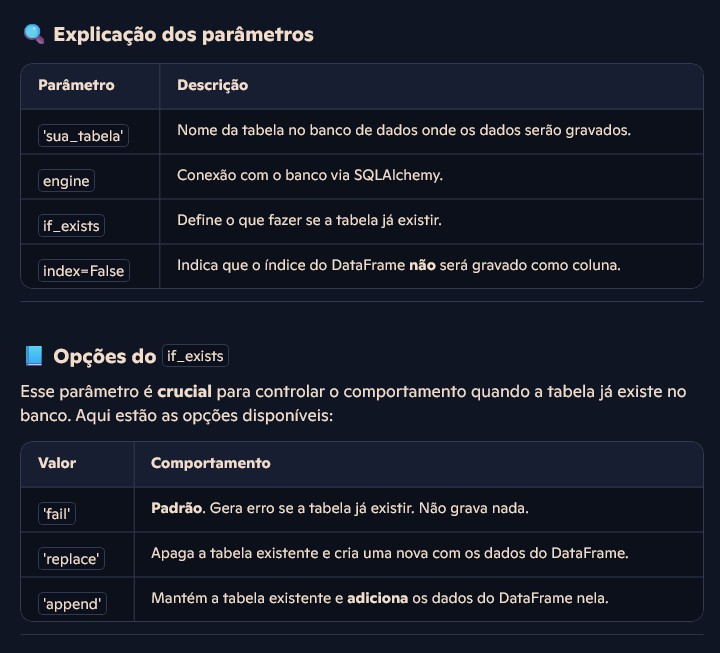

In [3]:
#Código para inserir o DataFrame no banco de dados e substituir a tabela existente
#df_data_Ingest.to_sql('Alunos_1', engine, if_exists='replace', index=False)
img = Image.open(r'C:\Aplicativos\Meus_Arquivos_Willian\Ambiente_Desenvolvimento\Imagem2.jpg')
display(img)

In [96]:

# 🛠️ Função de verificação e inserção
def verifica_e_insere(df_novo, tabela, coluna_data, engine):
    """
    Verifica se já existem registros na tabela para a data de hoje.
    Se não houver, insere os dados do DataFrame no banco.
    """
    hoje = datetime.today().date()

    # 🔎 Verifica se já existem registros para hoje
    query = f"""
        SELECT * FROM {tabela}
        WHERE CAST({coluna_data} AS DATE) = '{hoje}'
    """
    df_existente = pd.read_sql(query, engine)

    if not df_existente.empty:
        print("\n🔔 Atenção!")
        print(f"➡️ Já existem registros na tabela '{tabela}' para a data de hoje: {hoje}")
        print(f"📌 Quantidade de registros encontrados: {len(df_existente)}")
        print("🛑 Nenhum dado foi inserido no banco.")
        print("\n📋 Registros existentes:")
        print(df_existente.head())
    else:
        # ✅ Insere os dados
        df_novo.to_sql(tabela, engine, if_exists='append', index=False)
        print("\n✅ Inserção realizada com sucesso!")
        print(f"📅 Data: {hoje}")
        print(f"📥 Registros inseridos: {len(df_novo)}")
        print("\n📋 Dados inseridos:")
        print(df_novo.head())  # Corrigido: mostra os dados inseridos, não os existentes


# ▶️ Executa a função
verifica_e_insere(df_data_ingest, 'Alunos_1', 'Data', engine)

#Exporta o DataFrame para um arquivo xlsx
print("\n📤 Dados   DataFrame para arquivo Excel...")
df_data_ingest.to_excel(r'C:\Aplicativos\Meus_Arquivos_Willian\Ambiente_Desenvolvimento\Arquivos_out\Alunos_1.xlsx', index=False)


🔔 Atenção!
➡️ Já existem registros na tabela 'Alunos_1' para a data de hoje: 2025-08-19
📌 Quantidade de registros encontrados: 5
🛑 Nenhum dado foi inserido no banco.

📋 Registros existentes:
   id_aluno               nome data_nascimento sexo data_cadastro  \
0         1        Alan Moraes      1989-09-04    M    2024-05-01   
1         2  Alessandro Soares      1989-10-04    M    2024-05-01   
2         3    Alexander Peres      1989-08-22    M    2024-05-01   
3         4   Alexandre Sayuri      1989-04-25    M    2024-05-01   
4         5   Alexandre Moraes      1989-06-06    M    2024-05-01   

  login_cadastro                         Data  
0        WILCASA  2025-08-19 00:00:00.0000000  
1        WILCASA  2025-08-19 00:00:00.0000000  
2        WILCASA  2025-08-19 00:00:00.0000000  
3        WILCASA  2025-08-19 00:00:00.0000000  
4        WILCASA  2025-08-19 00:00:00.0000000  

📤 Dados   DataFrame para arquivo Excel...


In [97]:
# Inferindo os dados antes de inserir no banco
print("\n🔍 Inferindo os dados antes de inserir no banco..."
      "\n📊 Verifique os tipos de dados inferidos:" \
      "\n\n⚠️ Atenção: Verifique os tipos de dados inferidos, pois podem impactar no desempenho do banco de dados.")
     


🔍 Inferindo os dados antes de inserir no banco...
📊 Verifique os tipos de dados inferidos:

⚠️ Atenção: Verifique os tipos de dados inferidos, pois podem impactar no desempenho do banco de dados.


In [98]:
# Leitura dos dados da tabela original
print("\n📥 Lendo os dados da tabela original...")
df2 = pd.read_sql('SELECT * FROM [Alunos]', engine)
df2.head()  # Exibe as primeiras linhas do DataFrame

tipo_colunas = {
    'id_aluno': Integer,
    'nome': VARCHAR(100),
    'data_nascimento': Date,
    'sexo': VARCHAR(2),
    'login_cadastro': VARCHAR(50),
}

#Deletar registros da tabela Alunos_2 no banco de dados onde sexo seja igual a "M"
print("\n🗑️ Deletando registros da tabela 'Alunos_2' onde sexo é igual a 'M'..."
      "\n⚠️ Atenção: Isso removerá todos os registros com sexo 'M' da tabela."
      "\n\n🔄 Verifique se deseja prosseguir." \
      "\n\n🗑️ Deletando registros...")

with engine.begin() as conn: # o Context manager garante que a transação será concluída ou revertida BEGIN
    conn.execute(text("DELETE FROM Alunos_2 WHERE sexo = 'M'"))
print("\n✅ Registros deletados com sucesso.")

# criar uma nova tabela com os dados inferidos
#df2.to_sql('Alunos_2', engine, if_exists='replace', index=False, dtype=tipo_colunas)
print("\n✅ Tabela 'Alunos_2' criada com os dados inferidos.")


📥 Lendo os dados da tabela original...

🗑️ Deletando registros da tabela 'Alunos_2' onde sexo é igual a 'M'...
⚠️ Atenção: Isso removerá todos os registros com sexo 'M' da tabela.

🔄 Verifique se deseja prosseguir.

🗑️ Deletando registros...

✅ Registros deletados com sucesso.

✅ Tabela 'Alunos_2' criada com os dados inferidos.
